In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ssfm.files import *

In [2]:
image = cv2.imread('../../data/kubric_0/photos/20.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
camera_parameters_path = '../../data/courtright/SfM_products/agisoft_cameras.xml'
cameras = read_camera_parameters_agisoft(camera_parameters_path)

distortion_params = cameras['distortion_params']
matrix_intrinsics = cameras['K']

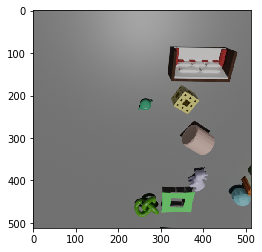

In [3]:
plt.imshow(image)

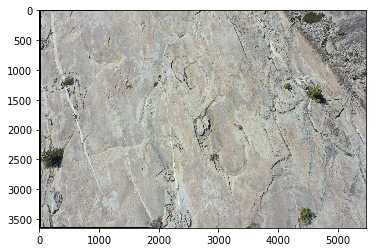

In [5]:
# undistort image using opencv undistort method
undistorted_image = cv2.undistort(image, matrix_intrinsics, distortion_params)
plt.imshow(undistorted_image)
plt.show()

In [3]:
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda:1"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [32]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [68]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=64,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.92,
    stability_score_offset = 0.8,
    box_nms_thresh = 0.9,
    crop_n_layers=0,
    crop_n_points_downscale_factor=0,
    min_mask_region_area=25,  # Requires open-cv to run post-processing
    output_mode='binary_mask',
)

In [69]:
masks2 = mask_generator_2.generate(image)

In [70]:
len(masks2)

58

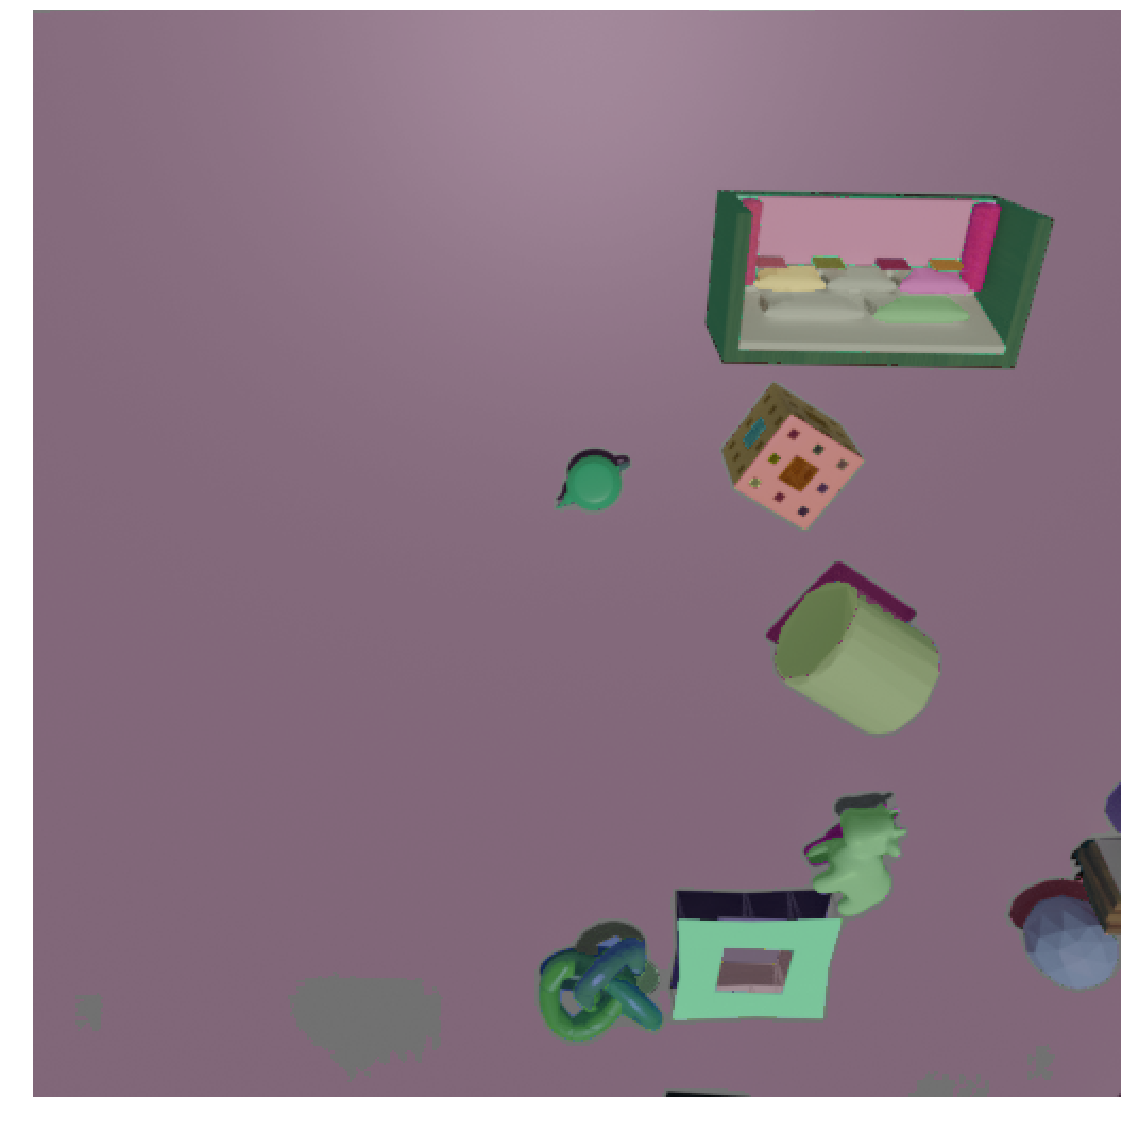

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 